# **선형회귀 Linear Regression**

In [4]:
import numpy as np 
import matplotlib.pylab as plt 

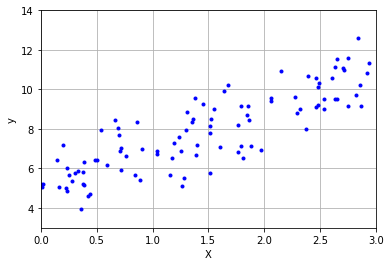

In [ ]:
np.random.seed(23)
X = 3 * np.random.rand(100, 1)
y = 5 + 2 * X + np.random.randn(100, 1) 

plt.plot(X, y, 'b.')
plt.xlim(0., 3.0)
plt.ylim(3, 14)
plt.grid()
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [ ]:
X_b = np.c_[np.ones((100, 1)), X] 

eta = 0.1 
n_iterations = 1000 
m = 100 

theta = np.random.randn(2, 1) 

for iteration in range(n_iterations): 
    ################################################## 
    #       gradients를 구하고 theta 업데이트        # 
    ################################################## 
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) -y)
    theta = theta - eta * gradients
    ################################################## 
    #                 코드 작성 끝                   # 
    ################################################## 

In [ ]:
theta 

array([[5.10749931],
       [1.89149406]])

결과 비교용 

array([[5.10749931], [1.89149406]])

In [ ]:
X_new = np.array([[0], [3]])
X_new_b = np.c_[np.ones((2, 1)), X_new] 
################################################## 
#                y_predict 구하기                # 
################################################## 
y_predict = X_new_b.dot(theta)
################################################## 
#                 코드 작성 끝                   # 
################################################## 

In [ ]:
y_predict

array([[ 5.10749931],
       [10.78198151]])

결과 비교용 

array([[ 5.10749931], [10.78198151]]) 

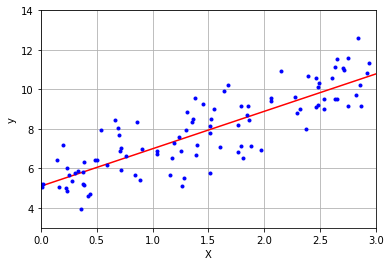

In [ ]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 3, 3, 14])
plt.grid()
plt.xlabel("X")
plt.ylabel("y")
plt.show()

결과 비교용

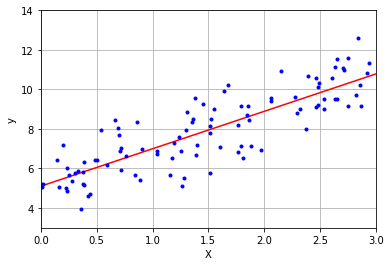

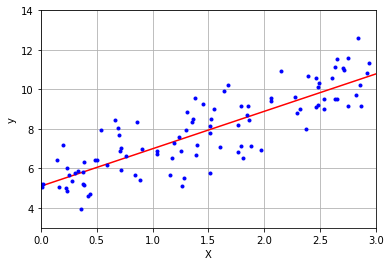

In [ ]:
from sklearn.linear_model import LinearRegression 
################################################## 
#           Scikit-learn으로 선형회귀            # 
################################################## 
lin_reg = LinearRegression()
lin_reg.fit(X, y)
################################################## 
#                 코드 작성 끝                   # 
################################################## 

plt.plot(X_new, lin_reg.predict(X_new), 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 3, 3, 14])
plt.grid()
plt.xlabel("X")
plt.ylabel("y")
plt.show()

결과 비교용

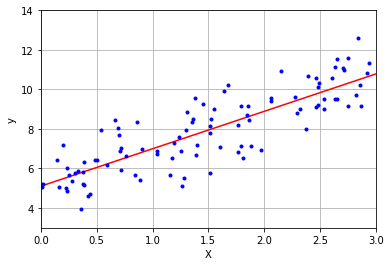

# **다항 회귀 Polynomial Regression**

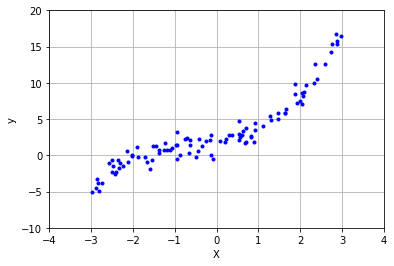

In [ ]:
X = 6 * np.random.rand(100, 1) - 3 
y = 0.3 * X**3 + 0.5 * X**2 + X + 2 + np.random.randn(100, 1) 

plt.plot(X, y, 'b.')
plt.xlim(-4., 4)
plt.ylim(-10, 20)
plt.grid()
plt.xlabel("X")
plt.ylabel("y")
plt.show()

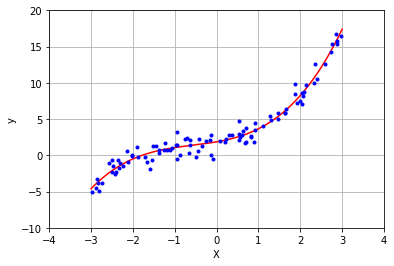

In [ ]:
from sklearn.preprocessing import PolynomialFeatures 
################################################## 
#           Scikit-learn으로 다항 회귀           # 
#   훈련 데이터 변환하여 LinearRegression 적용   #  
#             핸즈온 머신러닝 p. 178             # 
################################################## 
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
################################################## 
#                 코드 작성 끝                   # 
################################################## 

X_new = np.linspace(-3, 3, 1000).reshape(1000, 1)
X_new_poly = poly_features.fit_transform(X_new)

plt.plot(X_new, lin_reg.predict(X_new_poly), 'r-')
plt.plot(X, y, 'b.')
plt.axis([-4, 4, -10, 20])
plt.grid()
plt.xlabel("X")
plt.ylabel("y")
plt.show()

결과 비교용

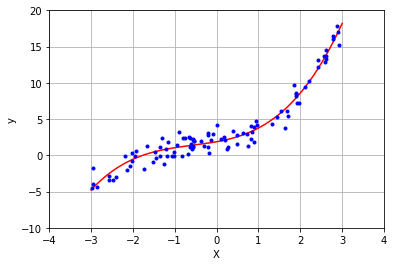

# **로지스틱 회귀 Logistic Regression**

와인 인식(분류) 데이터 세트 준비 

이탈리아에 있는 동일한 지역에서 만들어진 3개의 와인 분류

와인의 특징(feature) 13개 

class_0=0 / class_1=1 / class_2=2 

http://archive.ics.uci.edu/ml/datasets/Wine/

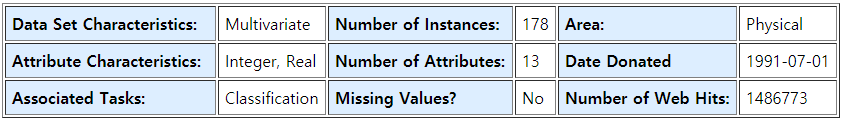

(178, 13) (178,)


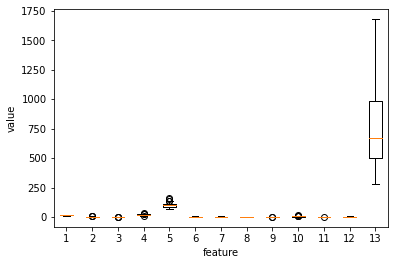

In [ ]:
from sklearn.datasets import load_wine 
wine = load_wine() 
print(wine.data.shape, wine.target.shape) 

plt.boxplot(wine.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [ ]:
################################################################# 
#                      target_names 출력                        # 
# 결과 : array(['class_0', 'class_1', 'class_2'], dtype='<U7')  #
################################################################# 
wine.target_names
################################################################# 
#                        코드 작성 끝                           # 
################################################################# 

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [ ]:
####################################################### 
#      박스 플롯에서 눈에 '유독' 띄는 특성 출력       # 
#                   결과 : 'proline'                  #
####################################################### 
wine.feature_names[12]
####################################################### 
#                        코드 작성 끝                 # 
####################################################### 

'proline'

In [ ]:
################################################################# 
#         wine.target에서 고유한 값과 등장 횟수 구하기          # 
#         결과 : (array([0, 1, 2]), array([59, 71, 48]))        #
################################################################# 
np.unique(wine.target, return_counts = True)
################################################################# 
#                        코드 작성 끝                           # 
################################################################# 

(array([0, 1, 2]), array([59, 71, 48]))

In [ ]:
################################################## 
#         X : 눈에 '유독' 띄는 특성 데이터       # 
#         y : class_0면 1, 그렇지 않으면 0       # 
################################################## 
X = wine["data"][:, 12:]
y = (wine["target"] == 0).astype(np.int)
################################################## 
#                 코드 작성 끝                   # 
################################################## 

In [11]:
################################################## 
#    Scikit-learn으로 로지스틱 회귀(log_reg)     # 
################################################## 
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)
################################################## 
#                 코드 작성 끝                   # 
################################################## 

KeyboardInterrupt: ignored

결과 비교용 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

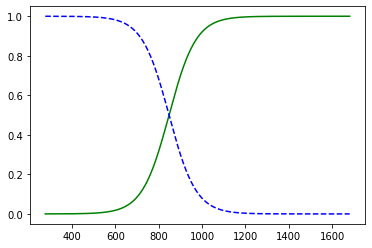

In [ ]:
X_new = np.linspace(278, 1680, 1000).reshape(-1, 1) 
################################################## 
#   log_reg로 X_new에 대한 확률 y_proba 구하기   # 
################################################## 
y_proba = log_reg.predict_proba(X_new)
################################################## 
#                 코드 작성 끝                   # 
################################################## 
plt.plot(X_new, y_proba[:, 1], 'g-', label='class_0')
plt.plot(X_new, y_proba[:, 0], 'b--', label='Not class_0')

결과 비교용

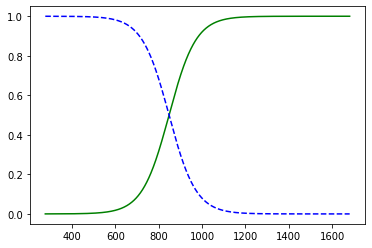

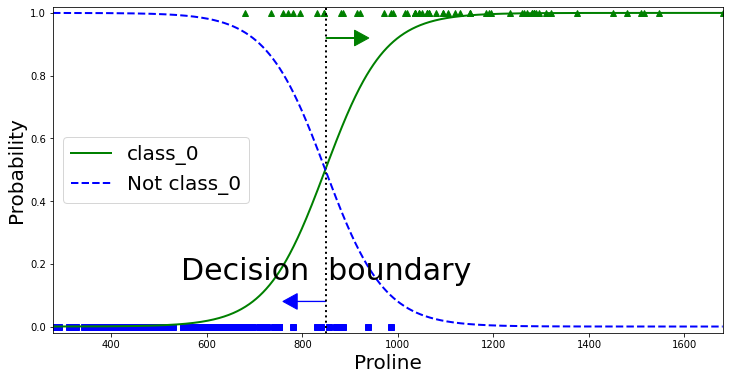

In [ ]:
X_new = np.linspace(278, 1680, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(12, 6))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="class_0")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not class_0")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=30, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -60, 0, head_width=0.05, head_length=30, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 60, 0, head_width=0.05, head_length=30, fc='g', ec='g')
plt.xlabel("Proline", fontsize=20)
plt.ylabel("Probability", fontsize=20)
plt.legend(loc="center left", fontsize=20)
plt.axis([278, 1680, -0.02, 1.02]) 
plt.show()

결과 비교용 

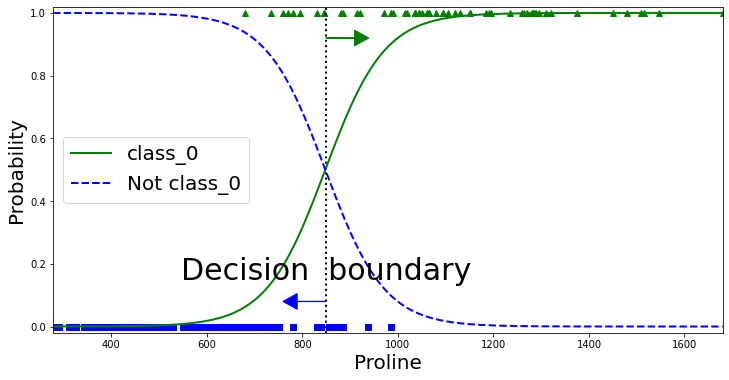

In [ ]:
decision_boundary

array([849.18518519])

결과 비교용 

array([849.18518519]) 

In [ ]:
################################################## 
#   log_reg에 분류 결과 얻기 위한 데이터 입력    # 
#             decision_boundary 참고             # 
#              결과 : array([1, 0])              # 
################################################## 
log_reg.predict([[850], [847]])
################################################## 
#                 코드 작성 끝                   # 
################################################## 

array([1, 0])

# **소프트맥스 회귀 Softmax Regression**

MNIST 데이터 세트 준비 

필기체 숫자 70000개 samples를 10개 class(0~9)로 분류

특징(feature) 784개 (28x28 = 784) 

http://yann.lecun.com/exdb/mnist/

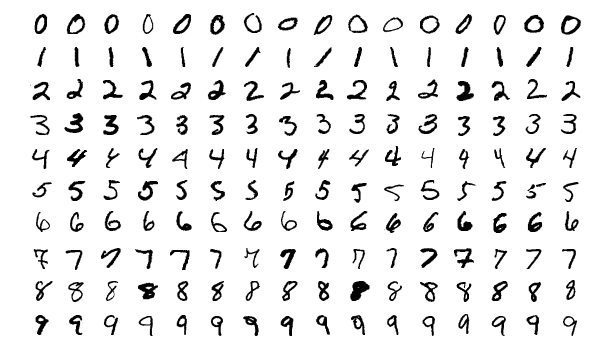

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
print(mnist.data.shape, mnist.target.shape)

(70000, 784) (70000,)


In [2]:
################################################## 
#    X와 y를 구축하고 훈련 데이터 세트 나누기    #
#         test_size=0.2, random_state=23         # 
################################################## 
from sklearn.model_selection import train_test_split

X = mnist.data
y = mnist.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 23)
################################################## 
#                 코드 작성 끝                   # 
################################################## 

In [5]:
print(X_train.shape, X_test.shape)
np.unique(y_train, return_counts = True)

(56000, 784) (14000, 784)


(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object),
 array([5538, 6258, 5543, 5695, 5473, 5101, 5498, 5783, 5509, 5602]))

결과 비교용

(56000, 784) (14000, 784)

(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object),
array([5538, 6258, 5543, 5695, 5473, 5101, 5498, 5783, 5509, 5602]))

In [10]:
################################################## 
# Scikit-learn으로 소프트맥스 회귀(softmax_reg)  # 
#            훈련하고 정확도 구하기              # 
#         max_iter=10, random_state=23           # 
#                 결과 : 0.888                   # 
#             ConvergenceWarning 발생            # 
################################################## 
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10, max_iter=10, random_state=23)
softmax_reg.fit(X_train, y_train)
softmax_reg.score(X_test, y_test)
################################################## 
#                 코드 작성 끝                   # 
################################################## 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.888